# Low level plotting utilities

This notebook demonstrates how to use the plotting utilities offered by the package to plot performance tables, functions and more.

## Import data

We start by importing the data from our notebook on the performance tables usage, so we have things to plot!

In [1]:
%matplotlib notebook
%config Completer.use_jedi = False
%run performance_table_usage.ipynb

# Plotting performance tables

In [2]:
from mcda.plot import *

<IPython.core.display.Javascript object>


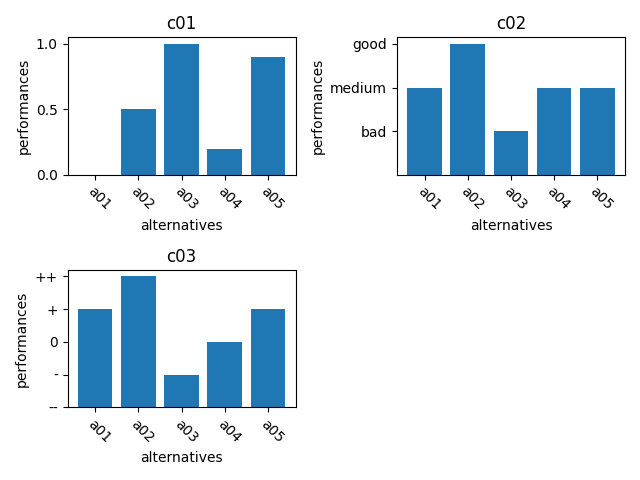

In [3]:
fig = Figure(ncols=2)

x = [*range(len(alternatives))]
xticks = x
xticklabels = alternatives
for i in criteria:
    values = ptable.get_criterion_values(perfTable, i)
    ax = fig.create_add_axis()
    ax.title = i
    ax.xlabel = "alternatives"
    ax.ylabel = "performances"
    yticks = None
    yticklabels = None
    y = values
    if isinstance(scales[i], QualitativeScale):
        y = [scales[i].transform_to(v) for v in values]
        yticklabels = scales[i].range()
        yticks = [
            scales[i].transform_to(yy) for yy in yticklabels
        ]
    elif isinstance(scales[i], NominalScale):
        yticklabels = scales[i].range()
        yticks = [*range(len(yticklabels))]
        y = [yticks[yticklabels.index(v)] for v in values]
    ax.add_plot(
        BarPlot(
            x,
            y,
            xticks=xticks,
            yticks=yticks,
            xticklabels=xticklabels,
            yticklabels=yticklabels,
            xticklabels_tilted=True,
        )
    )
fig.draw()

<IPython.core.display.Javascript object>


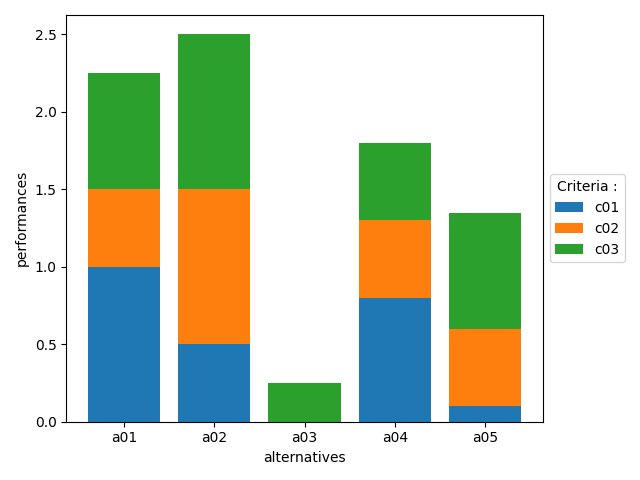

In [4]:
norm_table = ptable.normalize(perfTable, scales)

ax = Axis()
ax.xlabel = "alternatives"
ax.ylabel = "performances"
x = [*range(len(alternatives))]
xticks = x
xticklabels = alternatives
values = []
for i in criteria:
    y = ptable.get_criterion_values(norm_table, i)
    values.append(y)
ax.add_plot(
    StackedBarPlot(
        x,
        values,
        xticks=xticks,
        xticklabels=xticklabels,
        labels=criteria
    )
)
ax.add_legend("Criteria :")
ax.draw()

<IPython.core.display.Javascript object>


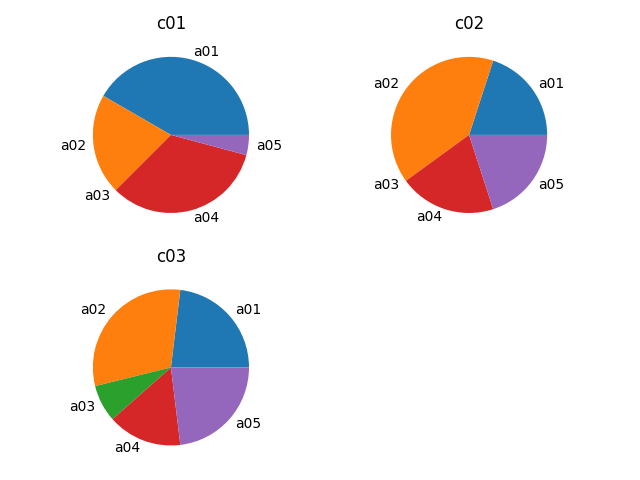

In [5]:
fig = Figure(ncols=2)

for i in criteria:
    values = ptable.get_criterion_values(norm_table, i)
    ax = fig.create_add_axis()
    ax.title = i
    ax.add_plot(
        PiePlot(
            alternatives,
            values
        )
    )
fig.draw()

<IPython.core.display.Javascript object>


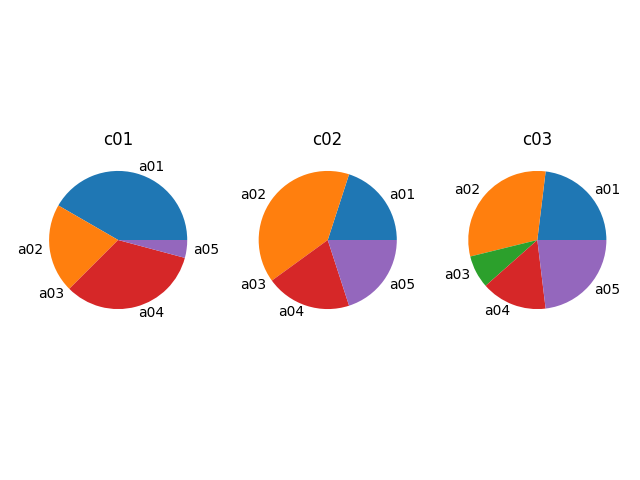

In [6]:
fig = Figure(nrows=1)

for i in criteria:
    values = ptable.get_criterion_values(norm_table, i)
    ax = fig.create_add_axis()
    ax.title = i
    ax.add_plot(
        PiePlot(
            alternatives,
            values
        )
    )
fig.draw()

<IPython.core.display.Javascript object>


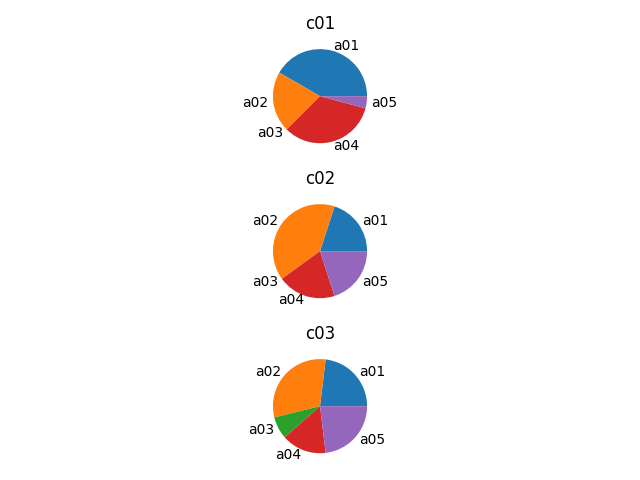

In [7]:
fig = Figure(ncols=1)

for i in criteria:
    values = ptable.get_criterion_values(norm_table, i)
    ax = fig.create_add_axis()
    ax.title = i
    ax.add_plot(
        PiePlot(
            alternatives,
            values
        )
    )
fig.draw()

<IPython.core.display.Javascript object>


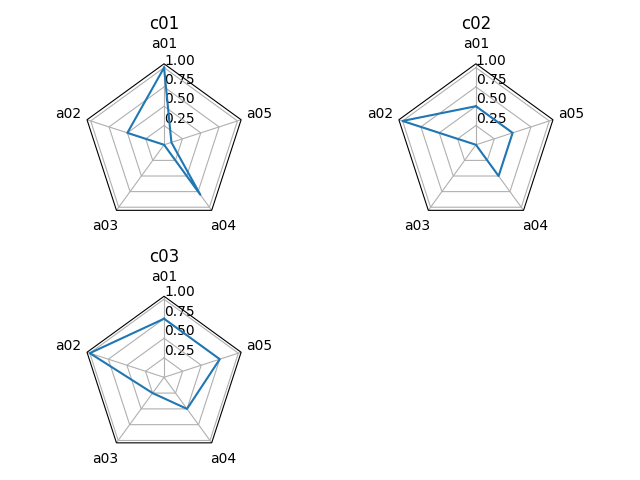

In [8]:
fig = Figure(ncols=2)

create_radar_projection(len(alternatives), frame="polygon")

for i in criteria:
    values = ptable.get_criterion_values(norm_table, i)
    ax = fig.create_add_axis(
        projection=radar_projection_name(len(alternatives)))
    ax.title = i
    ax.add_plot(
        RadarPlot(
            alternatives,
            values
        )
    )
fig.draw()

In [9]:
values = ptable.get_alternative_values_at(norm_table, 1)
values

c01    0.5
c02    1.0
c03    1.0
Name: a02, dtype: float64

<IPython.core.display.Javascript object>


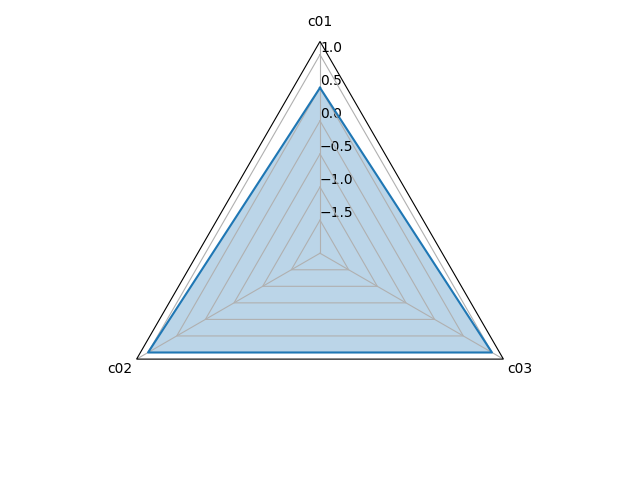

In [10]:
create_radar_projection(len(criteria), frame='polygon')
plot = RadarPlot(criteria, values, alpha=0.3, rlimits=[-2, 1.2])
plot.draw()

<IPython.core.display.Javascript object>


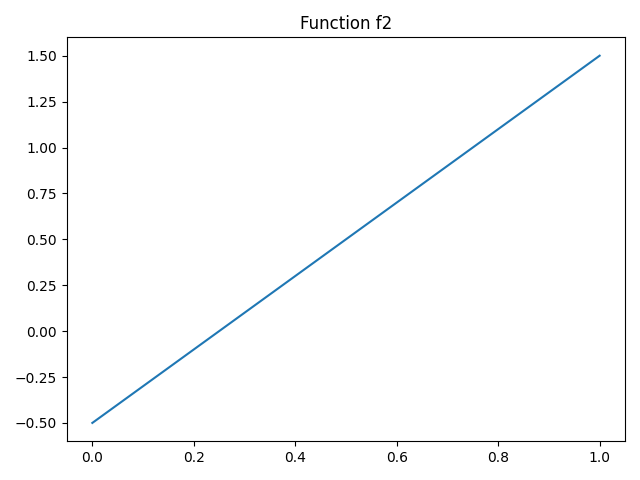

In [11]:
plot = LinePlot([0, 1], [f2_prev(0), f2_prev(1)])
plot.draw()
plot.axis.title = "Function f2"
plot.axis.figure.draw()

<IPython.core.display.Javascript object>


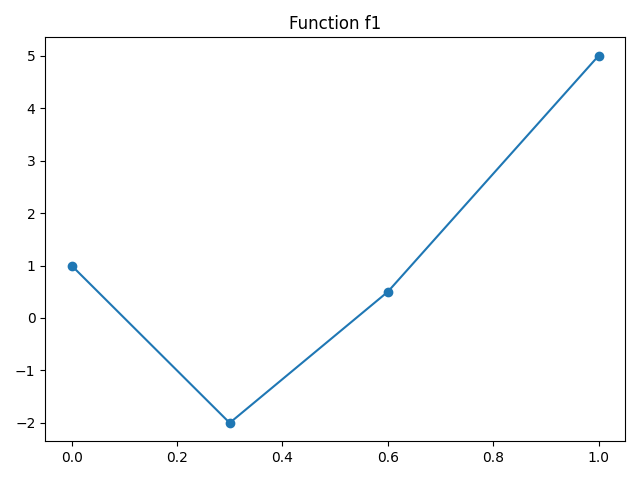

In [12]:
ax = Axis(title="Function f1")
x = []
y = []
for interval in f1.intervals:
    if len(x) == 0:
        x.append(interval.dmin)
        y.append(f1(interval.dmin))
    x.append(interval.dmax)
    y.append(f1(interval.dmax))
ax.add_plot(
    LinePlot(
        x,
        y,
        marker="o",
    )
)
ax.draw()

<IPython.core.display.Javascript object>


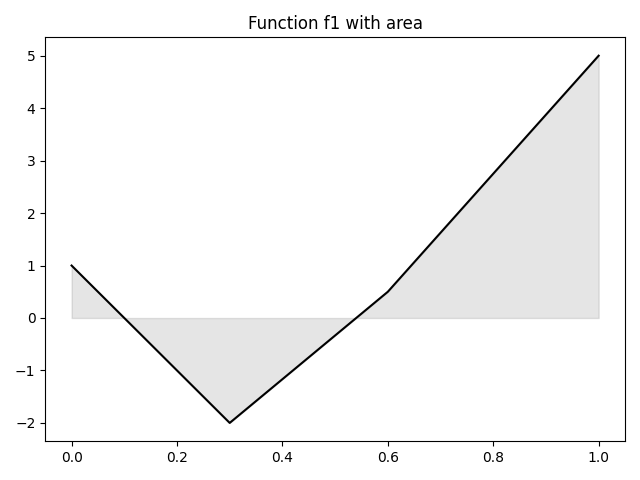

In [13]:
ax = Axis(title="Function f1 with area")
ax.add_plot(
    AreaPlot(
        x,
        y,
        color="black",
        alpha=0.1,
        strongline=True
    )
)
ax.draw()

<IPython.core.display.Javascript object>


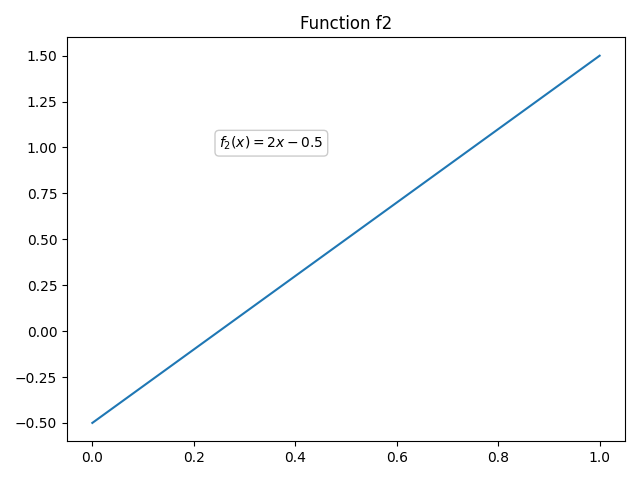

In [14]:
ax = Axis(title="Function f2")
x = [0, 0.2, 0.4, 0.6, 0.8, 1]
y = [f2_prev(value) for value in x]
ax.add_plot(
    LinePlot(
        x,
        y,
    )
)
ax.add_plot(
    Text(
        0.25,
        1,
        "$f_2(x) = 2x - 0.5$",
        horizontal_alignement="left",
        box=True,
    )
)
ax.draw()

<IPython.core.display.Javascript object>


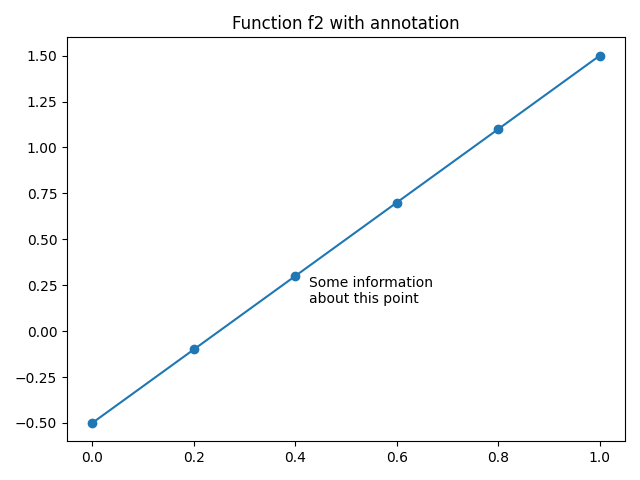

In [15]:
ax = Axis(title="Function f2 with annotation")
ax.add_plot(
    LinePlot(
        x,
        y,
        marker="o",
    )
)
ax.add_plot(
    Annotation(
        x[2],
        y[2],
        "Some information \nabout this point",
        10,
        0,
        horizontal_alignement="left",
        vertical_alignement="top",
    )
)
ax.draw()

<IPython.core.display.Javascript object>


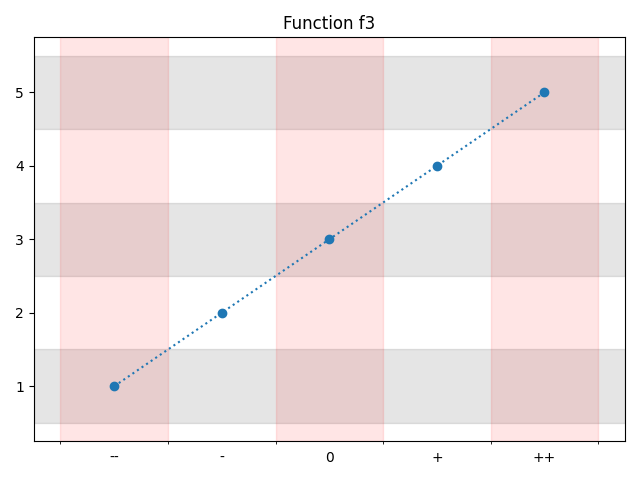

In [16]:
ax = Axis(title="Function f3")
ax.add_plot(
    HorizontalStripes(
        [0.5, 1.5, 2.5, 3.5, 4.5, 5.5],
        color="black",
        alpha=0.1,
    )
)
ax.add_plot(
    VerticalStripes(
        [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5],
        color="red",
        alpha=0.1,
        attach_xticks=True,
    )
)
ax.add_plot(
    LinePlot(
        [*range(len(f3.values.keys()))],
        [*f3.values.values()],
        xticks=[*range(len(f3.values.keys()))],
        xticklabels=[*f3.values.keys()],
        linestyle=":",
        marker="o",
    )
)
ax.draw()

<IPython.core.display.Javascript object>


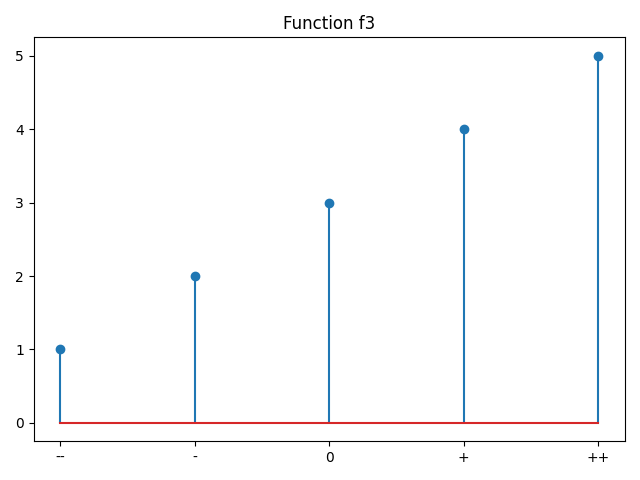

In [17]:
plot = StemPlot(
    [*range(len(f3.values.keys()))],
    [*f3.values.values()],
    xticks=[*range(len(f3.values.keys()))],
    xticklabels=[*f3.values.keys()]
)
plot.draw()
plot.axis.title = "Function f3"
plot.axis.figure.draw()

<IPython.core.display.Javascript object>


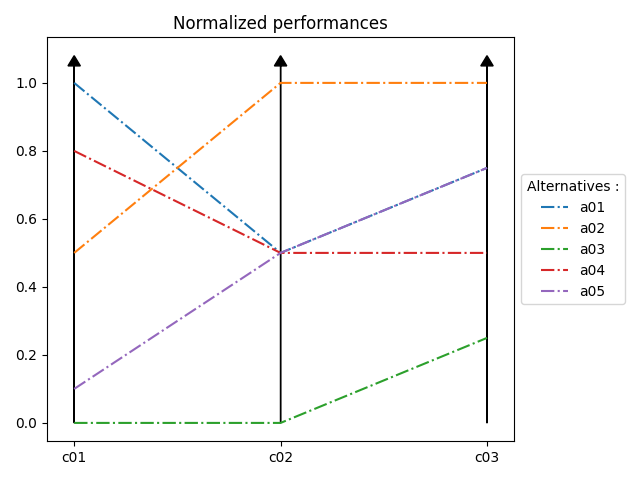

In [18]:
ax = Axis(title="Normalized performances")
x = [*range(len(criteria))]
values = norm_table
xticks=[*range(len(criteria))]
xticklabels=criteria
ax.add_plot(
    ParallelCoordinatesPlot(
        x,
        values,
        xticks=xticks,
        xticklabels=xticklabels,
        labels=alternatives,
        linestyle="-.",
    )
)
ax.add_legend(title="Alternatives :", location="right")
ax.draw()

<IPython.core.display.Javascript object>


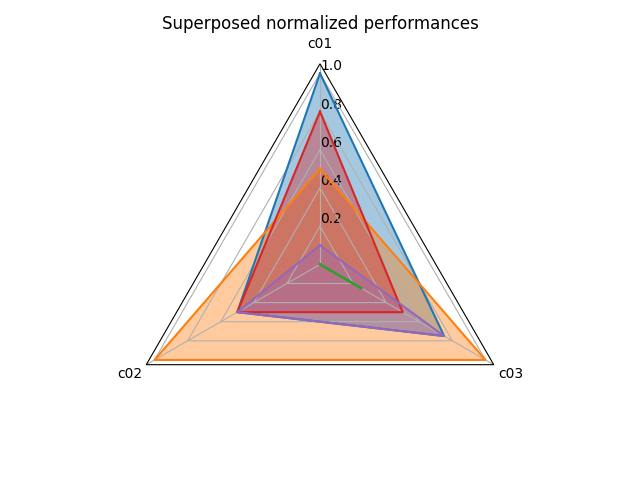

In [19]:
ax = Axis(
    projection=radar_projection_name(len(criteria)),
    title='Superposed normalized performances'
)

for a in alternatives:
    ax.add_plot(
        RadarPlot(
            criteria,
            ptable.get_alternative_values(norm_table, a),
            alpha=0.4,
        )
    )
ax.draw()